# Análise de dados com Pandas e Seaborn

O Pandas é uma biblioteca Python de código aberto para análise de dados. Ela fornece ferramentas de análise de dados e estruturas de dados de alta performance e fáceis de usar. Já o Seaborn é uma biblioteca Python de visualização de dados baseada no matplotlib. Ela fornece uma interface de alto nível para desenhar gráficos estatísticos atraentes e informativos. Sua vantagem sobre o Matplotlib puro é que Seaborn fornece padrões de plotagem estatística que podem ser facilmente ativados com apenas alguns comandos.

A base de dados utilizada aqui é de churn de clientes de uma empresa de telecomunicações. O churn é uma métrica que indica a taxa de evasão de clientes. Neste caso, o churn é definido como a perda de clientes para a concorrência ou por desinteresse em continuar com o serviço. O objetivo é analisar os dados e identificar os principais fatores que levam um cliente a cancelar o serviço.

Temos o seguinte dicionário de dados:

- `id_cliente`: identificador único do cliente
- `genero`: gênero do cliente
- `idoso`: indica se o cliente é idoso (mais de 65 anos) ou não
- `tem_parceiro`: indica se o cliente tem parceiro ou não
- `tem_dependentes`: indica se o cliente tem dependentes ou não
- `meses_na_empresa`: quantidade de meses que o cliente permaneceu na empresa
- `servico_telefone`: indica se o cliente tem serviço de telefone ou não
- `multiplas_linhas`: indica se o cliente tem múltiplas linhas ou não
- `servico_internet`: indica se o cliente tem serviço de internet (DSL ou fibra óptica) ou não
- `servico_seguranca`: indica se o cliente tem serviço de segurança online ou não
- `servico_backup`: indica se o cliente tem serviço de backup online ou não
- `servico_protecao_equipamento`: indica se o cliente tem serviço de proteção do equipamento de conexão ou não
- `servico_suporte_tecnico`: indica se o cliente tem serviço de suporte técnico prioritário ou não
- `streaming_tv`: indica se o cliente tem serviço de streaming de TV ou não
- `streaming_filmes`: indica se o cliente tem serviço de streaming de filmes ou não
- `contrato`: tipo de contrato do cliente (mensal, anual ou dois anos)
- `fatura_digital`: indica se o cliente recebe a fatura por e-mail ou não
- `forma_pagamento`: forma de pagamento do cliente (cheque, boleto, transferência bancária ou cartão de crédito)
- `valor_mensal`: valor mensal do serviço contratado
- `total_gasto`: valor total gasto pelo cliente
- `churn`: indica se o cliente cancelou o serviço no mês anterior ou não



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style='dark', palette='bright', context='notebook')

ARQUIVO_DADOS = 'churn_clientes.csv'

df_churn = pd.read_csv(ARQUIVO_DADOS)
df_churn = df_churn.drop(columns='id_cliente', axis=1)


colunas_numericas = df_churn.select_dtypes(include='number').columns
colunas_categoricas = df_churn.select_dtypes(exclude='number').columns
colunas_categoricas = colunas_categoricas.drop('churn')

df_churn.head()

,genero,idoso,tem_parceiro,tem_dependentes,meses_na_empresa,servico_telefone,multiplas_linhas,servico_internet,servico_seguranca,servico_backup,servico_protecao_equipamento,servico_suporte_tecnico,streaming_tv,streaming_filmes,contrato,fatura_digital,forma_pagamento,valor_mensal,total_gasto,churn
0,Feminino,Não,Sim,Não,1,Não,Não,DSL,Não,Sim,Não,Não,Não,Não,Mensal,Sim,Boleto,29.85,29.85,Não
1,Masculino,Não,Não,Não,34,Sim,Não,DSL,Sim,Não,Sim,Não,Não,Não,Anual,Não,Cheque,56.95,1889.50,Não
2,Masculino,Não,Não,Não,2,Sim,Não,DSL,Sim,Sim,Não,Não,Não,Não,Mensal,Sim,Cheque,53.85,108.15,Sim
3,Masculino,Não,Não,Não,45,Não,Não,DSL,Sim,Não,Sim,Sim,Não,Não,Anual,Não,Transferencia,42.30,1840.75,Não
4,Feminino,Não,Não,Não,2,Sim,Não,Fibra optica,Não,Não,Não,Não,Não,Não,Mensal,Sim,Boleto,70.70,151.65,Sim


## Análise das variáveis numéricas


### Boxplot

Uma análise útil é visualizar os boxplots das variáveis numéricas de acordo com o churn. Dessa forma, podemos identificar se existem diferenças significativas na distribuição das variáveis numéricas de acordo com o churn.

Um boxplot é um gráfico que apresenta informações sobre a distribuição de uma variável numérica. Ele é composto por um retângulo, que representa o intervalo entre o primeiro e o terceiro quartil da distribuição. A linha no meio do retângulo representa a mediana. As linhas que se estendem para fora do retângulo são chamadas de bigodes e representam a variabilidade fora do intervalo entre o primeiro e o terceiro quartil. Os pontos que se estendem além dos bigodes são considerados outliers.

Um quartil é um valor que divide uma distribuição em quatro partes iguais. O primeiro quartil (Q1) é o valor que divide os 25% menores valores da distribuição. O segundo quartil (Q2) é o valor que divide os 50% menores valores da distribuição, ou seja, a mediana. O terceiro quartil (Q3) é o valor que divide os 75% menores valores da distribuição.

O critério de outliers utilizado pelo Seaborn é o intervalo interquartil (IQR). O IQR é a diferença entre o terceiro e o primeiro quartil (IQR = Q3 - Q1). Um valor é considerado outlier se for menor que Q1 - 1.5 * IQR ou maior que Q3 + 1.5 * IQR.

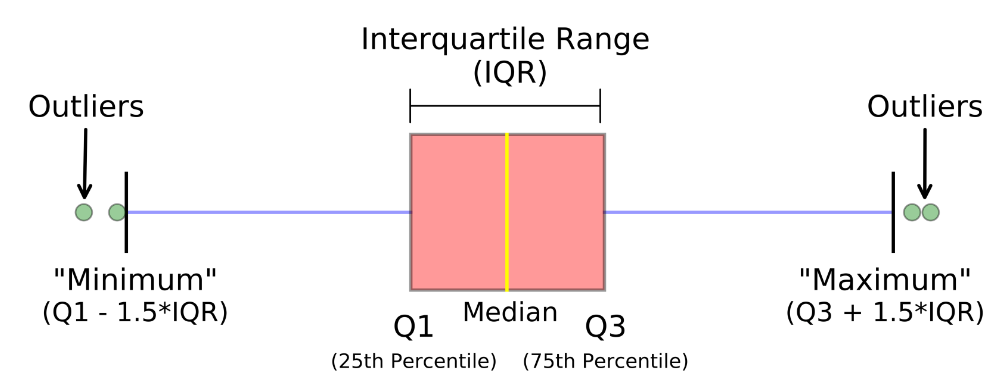

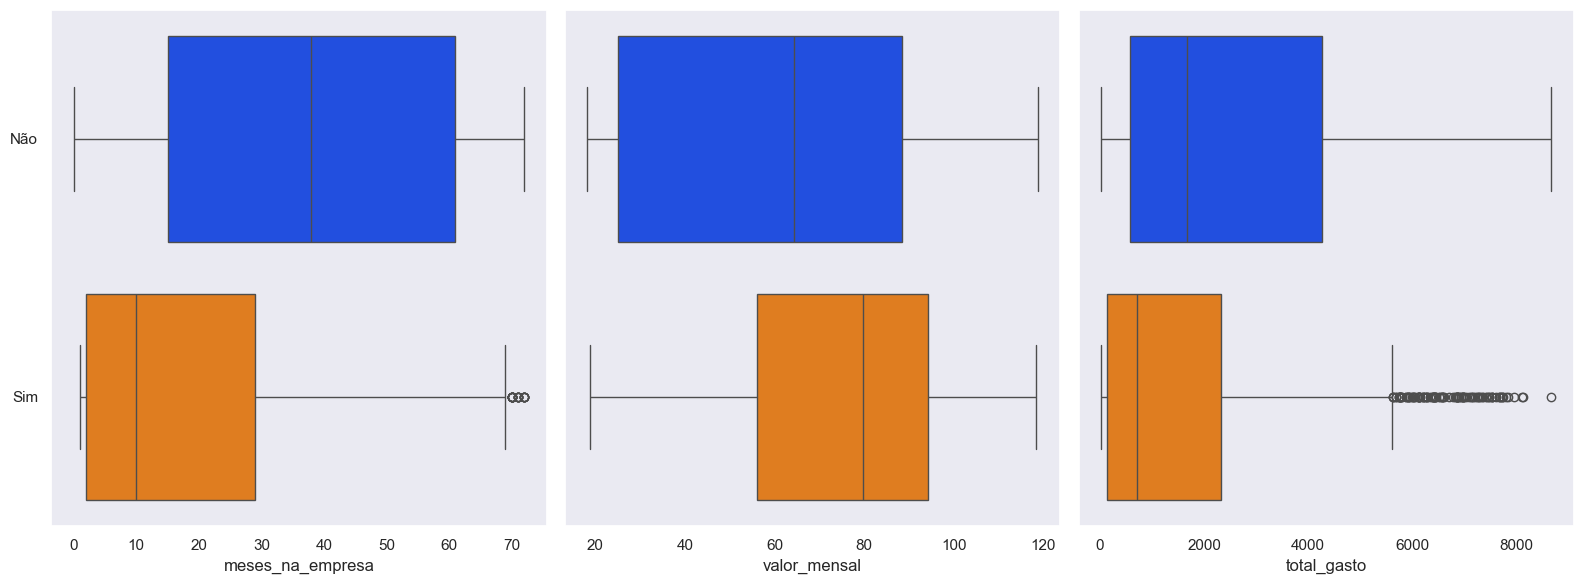

In [14]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(16,6), tight_layout=True, sharey=True)

for i, coluna in enumerate(colunas_numericas):
    sns.boxplot(x=coluna, y='churn', data=df_churn, ax=axs[i], hue='churn')
    axs[i].set_ylabel('')

plt.show()